# Mobile Price Classification
### Rana Karmakar
#### NSTI-Bhubaneswar
#### 22-10-2021

# Prepare Problem

## a. Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle

## b. Load Dataset

In [2]:
df = pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Shape and Columns

In [3]:
print('Train Data shape=',df.shape)
print('Train Data columns=',df.columns)

Train Data shape= (2000, 21)
Train Data columns= Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


# 2. Summarize Data

## Data Cleaning - Check for Null Values

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## a. Descriptive Statistics

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Unique Value - price_range

In [6]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [7]:
df.columns.value_counts()

sc_h             1
sc_w             1
four_g           1
m_dep            1
mobile_wt        1
dual_sim         1
wifi             1
n_cores          1
battery_power    1
clock_speed      1
pc               1
three_g          1
px_width         1
px_height        1
int_memory       1
talk_time        1
price_range      1
ram              1
blue             1
fc               1
touch_screen     1
dtype: int64

## Dataset Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## b. Data Visualization

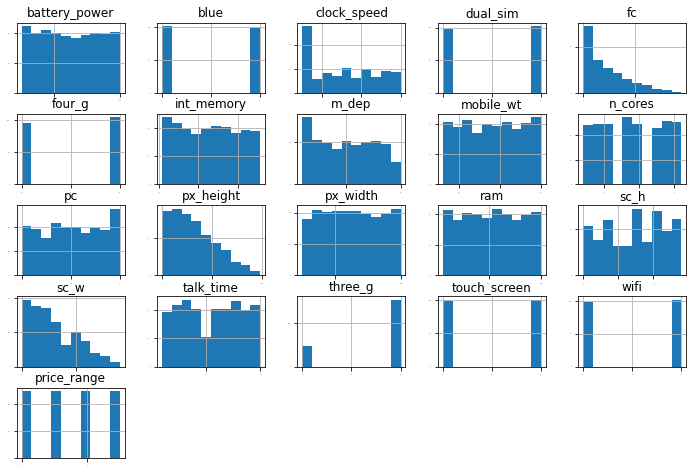

In [9]:
df.hist(xlabelsize=1,ylabelsize=1,figsize=(12,8))
plt.show()

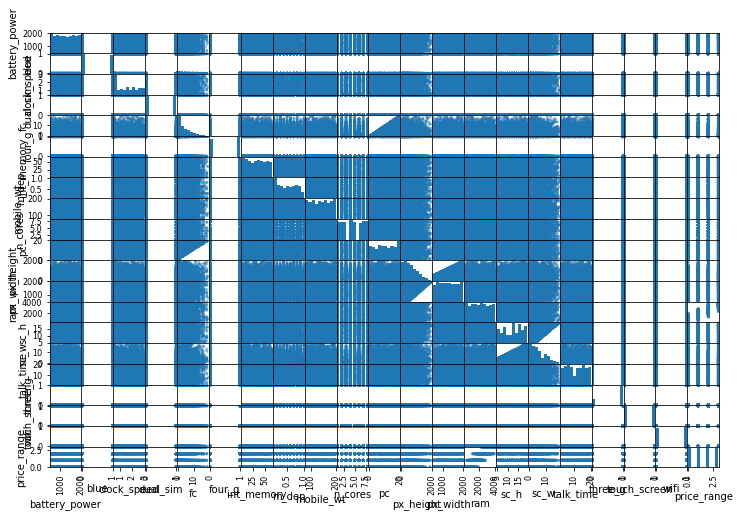

In [10]:
scatter_matrix(df,figsize=(12, 8))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

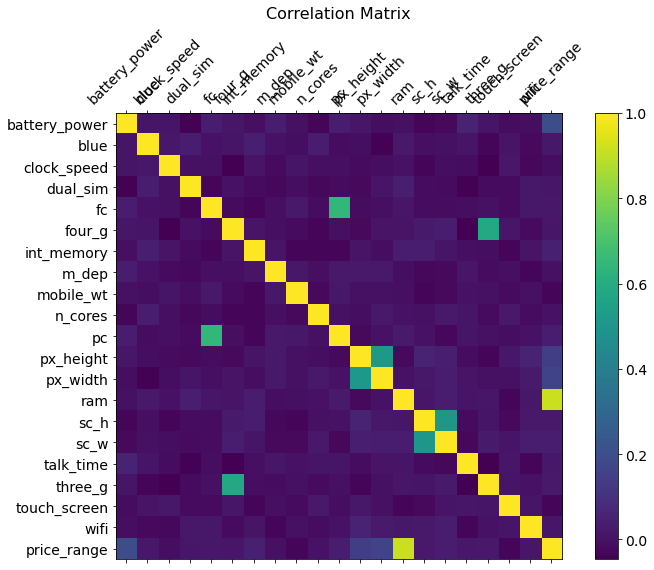

In [11]:
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

<AxesSubplot:xlabel='sc_w', ylabel='Count'>

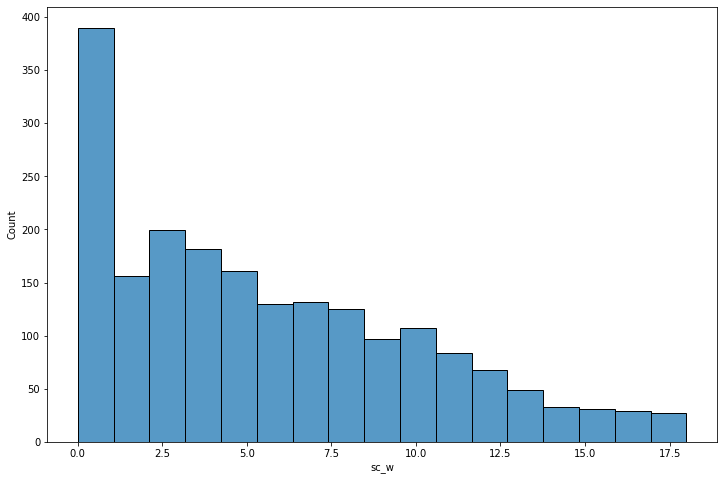

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.sc_w)

<Figure size 1008x648 with 0 Axes>

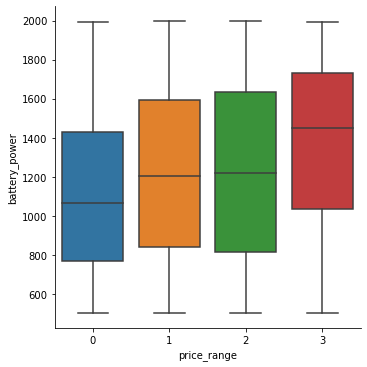

In [13]:
plt.figure(figsize=(14, 9))
sns.catplot(x="price_range", y="battery_power", kind="box", data=df)

<Figure size 864x504 with 0 Axes>

<Figure size 1008x648 with 0 Axes>

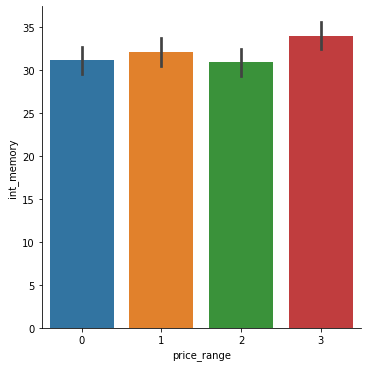

In [14]:
plt.figure(figsize=(12,7))
plt.figure(figsize=(14, 9))
sns.catplot(x="price_range", y="int_memory", kind="bar", data=df)
plt.show()

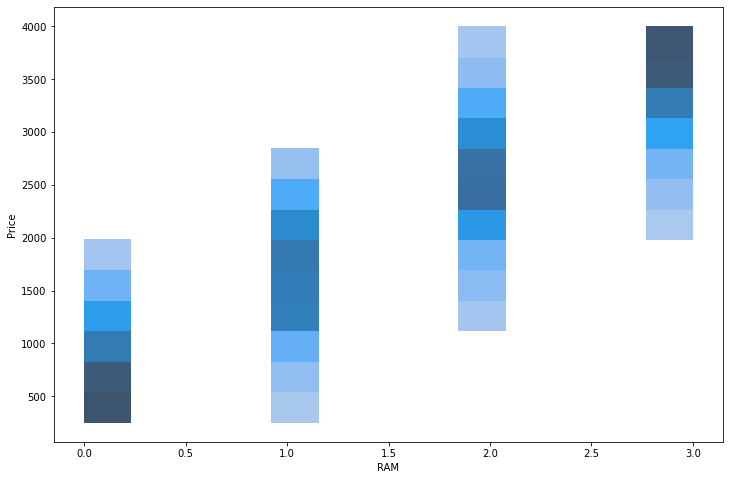

In [15]:
plt.figure(figsize=(12, 8))
plt1 = sns.histplot(y = 'ram', x = 'price_range', data = df)
plt1.set_xlabel('RAM')
plt1.set_ylabel('Price')
plt.show()

# 3. Prepare Data

## a. Split Out Dataset

In [24]:
X=df.drop(columns=['price_range'])
Y=df['price_range']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

## b. Feature Selection - Train Dataset

In [25]:
rf=RandomForestClassifier()
 
rf.fit(x_train,y_train)
rf.feature_importances_

array([0.07647521, 0.00692397, 0.02989248, 0.00742922, 0.02566472,
       0.00688652, 0.03889456, 0.02640854, 0.04221358, 0.0237493 ,
       0.03151362, 0.05617685, 0.06152526, 0.45642497, 0.02755842,
       0.02813292, 0.03372412, 0.00600429, 0.00778666, 0.00661478])

Text(0.5, 0, 'Random Forest Feature Importance')

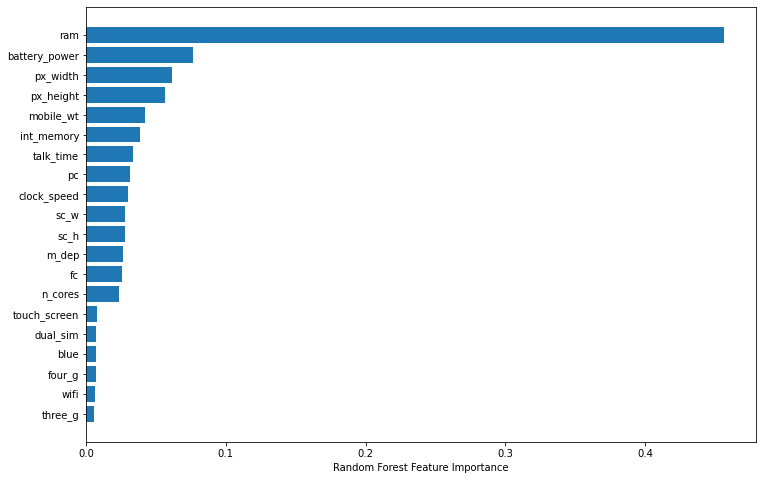

In [26]:
plt.figure(figsize=(12, 8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Removing Unwanted Columns from Train Dataset

In [27]:
x_train=x_train.drop(columns=['touch_screen','wifi','dual_sim','four_g','blue','three_g'])
x_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
910,1205,0.5,3,12,0.6,175,4,6,573,614,860,14,1,14
995,1456,1.6,5,49,0.2,193,3,20,1285,1427,3624,12,11,16
1329,1384,2.8,15,60,0.1,82,3,18,983,1210,1221,18,12,15
953,852,1.6,6,54,0.4,147,5,7,538,730,1275,13,7,12
1374,1263,1.4,1,32,0.4,103,2,2,409,644,3372,18,13,10


## Dataset Shape - After Feature Selection

In [28]:
print(x_train.shape)

(1400, 14)


### Removing Unwanted Columns from Testing Dataset

In [29]:
x_test=x_test.drop(columns=['touch_screen','wifi','dual_sim','four_g','blue','three_g'])
x_test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
432,1421,2.8,0,57,0.4,165,1,2,781,1657,2775,13,8,14
500,1278,0.5,1,54,0.1,104,8,16,581,750,1155,7,1,20
745,894,2.1,16,16,0.7,168,8,20,286,1300,3377,5,1,6
694,1310,1.4,0,33,0.4,105,1,14,806,1016,1301,13,12,19
1627,865,2.9,5,16,0.1,89,4,12,335,1009,3494,13,3,14


# Data Standarize

#### Train Data - Datandarize

In [30]:
# Check for data standard
x_train.std()

battery_power     443.436641
clock_speed         0.816797
fc                  4.291888
int_memory         18.184457
m_dep               0.285654
mobile_wt          35.565910
n_cores             2.280816
pc                  6.119977
px_height         441.417448
px_width          432.277907
ram              1082.274702
sc_h                4.215160
sc_w                4.390479
talk_time           5.412326
dtype: float64

In [31]:
#Applying StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
print(x_train_std.std())

1.0


In [32]:
x_train=x_train_std

#### Test Data - Satandarize

In [33]:
# Check for data standard
x_test.std()

battery_power     429.971406
clock_speed         0.814729
fc                  4.443730
int_memory         18.065231
m_dep               0.294842
mobile_wt          35.026630
n_cores             2.305947
pc                  5.923763
px_height         449.568181
px_width          431.962513
ram              1090.856861
sc_h                4.208108
sc_w                4.270095
talk_time           5.586740
dtype: float64

In [34]:
#scaler = StandardScaler()
scaler.fit(x_test)
x_test_std = scaler.transform(x_test)
print(x_test_std.std())

1.0


In [35]:
x_test=x_test_std

## Train Data - After Standarization

<AxesSubplot:>

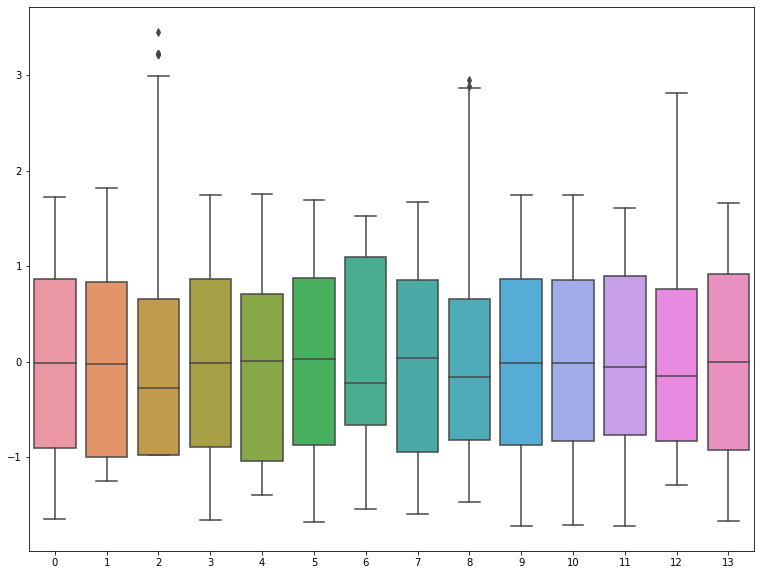

In [36]:
plt.figure(figsize=(13, 10))
sns.boxplot(data=x_train)  

In [37]:
x_test

array([[ 0.39402521,  1.55641514, -1.03903318, ...,  0.127638  ,
         0.46798317,  0.54549537],
       [ 0.06116746, -1.26896357, -0.81380923, ..., -1.29937074,
        -1.1726924 ,  1.6203631 ],
       [-0.83266035,  0.69651727,  2.56455011, ..., -1.77504032,
        -1.1726924 , -0.8876616 ],
       ...,
       [ 1.66959199, -0.90043591,  0.0870866 , ...,  0.84114237,
         0.23360095, -0.70851698],
       [-1.07939407,  1.18788749, -0.13813736, ..., -0.11019679,
         0.46798317, -0.8876616 ],
       [ 0.15194685, -0.04053804,  0.31231055, ..., -1.29937074,
        -1.40707462,  0.00806151]])

# Model Building

### Model Algo Evaluation


In [55]:
# Algos to be Used
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

## Evaluation in Each Algo

In [56]:
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    result = confusion_matrix(y_test, prediction)
    print("                                                                                                            ")
    print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
    print("Algorithnm :",model)
    print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, prediction)
    print("Classification Report:",)
    print (result1)
    result2 = accuracy_score(y_test,prediction)
    print ('R Squared =',r2_score(y_test, prediction))
    print("Accuracy:  ",result2*100,"%")

                                                                                                            
````````````````````````````````````````````````````````````````````````````````````````````````````````````
Algorithnm : LogisticRegression()
````````````````````````````````````````````````````````````````````````````````````````````````````````````
Confusion Matrix:
[[147   0   0   0]
 [  8 134   2   0]
 [  0   8 144   1]
 [  0   0   5 151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       147
           1       0.94      0.93      0.94       144
           2       0.95      0.94      0.95       153
           3       0.99      0.97      0.98       156

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

R Squared = 0.9682312763084743
Accuracy:   96.0 %
                                    

## Hyperparameter Tuning

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [58]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969286 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.969048 (0.012418) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.969048 (0.012418) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.855476 (0.028612) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.969286 (0.012115) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.969286 (0.012115) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.840952 (0.028148) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.959286 (0.015557) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.959286 (0.015557) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.812381 (0.027289) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.914524 (0.026373) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914524 (0.026373) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.750952 (0.032300) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.784524 (0.036285) with

In [59]:
model = LogisticRegression(C=10, penalty='l2', solver='newton-cg')

In [60]:
model.fit(x_train,y_train)
lprediction=model.predict(x_test)
lresult = confusion_matrix(y_test, lprediction)
print("                                                                                                            ")
print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
print("Algorithnm :",model)
print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
print("Confusion Matrix:")
print(lresult)
lresult1 = classification_report(y_test, lprediction)
print("Classification Report:",)
print (lresult1)
lresult2 = accuracy_score(y_test,lprediction)
print ('R Squared =',r2_score(y_test, lprediction))
print("Accuracy:  ",lresult2*100,"%")

                                                                                                            
````````````````````````````````````````````````````````````````````````````````````````````````````````````
Algorithnm : LogisticRegression(C=10, solver='newton-cg')
````````````````````````````````````````````````````````````````````````````````````````````````````````````
Confusion Matrix:
[[147   0   0   0]
 [  9 133   2   0]
 [  0   9 144   0]
 [  0   0   5 151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       147
           1       0.94      0.92      0.93       144
           2       0.95      0.94      0.95       153
           3       1.00      0.97      0.98       156

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

R Squared = 0.9669075794879941
Accuracy:   95.83333333333334 %

## Prediction with Best Algo - Logistic Regression
### Here we have to upload our Input Data
#### We are using Logistic Regression Algorithm becouse this is a Multi-class Classification Problem

In [61]:
pred_data=pd.read_csv("test.csv")

### Preprocessing for Input Data

In [62]:
def inputData(test):
    print("Before Feature Selection Shape of dataset :",test.shape)
    test=test.drop(columns=['id','touch_screen','wifi','dual_sim','four_g','blue','three_g'])
    print("After Feature Selection Shape of dataset :",test.shape)
    print("We are Selecting Best Features for Avoid Over and Under Fitting for the best Results")
    return scaler.transform(test)
i = inputData(pred_data)

Before Feature Selection Shape of dataset : (1000, 21)
After Feature Selection Shape of dataset : (1000, 14)
We are Selecting Best Features for Avoid Over and Under Fitting for the best Results


# Predicted Results

In [65]:
final_model = LogisticRegression(C=10, penalty='l2', solver='newton-cg')
final_model.fit(x_train,y_train)
result=final_model.predict(i)
dataa= pd.DataFrame(data={"Predicted Price_range is : ":result})
print(dataa.head())

   Predicted Price_range is : 
0                            2
1                            3
2                            2
3                            3
4                            1


# Saving the Model

In [70]:
# save the model to disk
filename = 'finalized_model_Mobile_Price_Classification.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [71]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_result = loaded_model.score(x_test, y_test)
print(loaded_result)

0.9583333333333334
